In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

In [ ]:
url = 'https://raw.githubusercontent.com/Vz-3/dataset_storage/master/emotions/compiled/fe_dataset.csv'
data = pd.read_csv(url)

In [ ]:
global class_labels
class_labels = ['angry','disgust','fear','happy','sad','suprised']
data.shape

(150, 711)

In [ ]:
data.describe()

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.930667,0.124548,0.175705,-0.954120,-0.123385,0.194845,-0.951982,0.000620,0.193100,359.703333,...,0.340000,0.366667,0.573333,0.273333,0.366667,0.253333,0.673333,0.473333,0.320000,0.186667
std,0.107837,0.154167,0.122841,0.068578,0.155815,0.113497,0.060456,0.138819,0.122196,405.928032,...,0.475296,0.483509,0.496250,0.447164,0.483509,0.436377,0.470565,0.500961,0.468039,0.390949
min,0.025000,-0.350575,-0.240919,-0.999884,-0.863815,-0.140013,-0.999991,-0.440000,-0.166000,33.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.925000,0.044372,0.098251,-0.986520,-0.190151,0.118849,-0.982971,-0.063500,0.108000,151.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.975000,0.103121,0.180630,-0.965332,-0.115947,0.205420,-0.966608,-0.010500,0.201500,261.100000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.975000,0.197849,0.260547,-0.943824,-0.049722,0.279880,-0.941752,0.058000,0.275000,410.425000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,0.000000
max,0.975000,0.879653,0.424370,-0.300784,0.226165,0.447394,-0.432268,0.387000,0.573000,3849.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
totalFeatures = len(data.columns)
max = 0.33 # up to 0.5, sophisticated models like gradient or random forest barely change, as well as svm.

In [ ]:
data.dropna(how='any', inplace=True)

X = np.array(data.drop(columns=['emotion']))
y = np.array(data['emotion'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
num_features_to_select = (math.ceil(totalFeatures*max))
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

SVM Classification Report:
              precision    recall  f1-score   support

       angry       0.10      0.17      0.12         6
     disgust       0.17      0.17      0.17         6
        fear       0.36      0.67      0.47         6
       happy       0.83      0.71      0.77         7
         sad       0.00      0.00      0.00         7
    suprised       0.00      0.00      0.00         6

    accuracy                           0.29        38
   macro avg       0.24      0.29      0.26        38
weighted avg       0.25      0.29      0.26        38



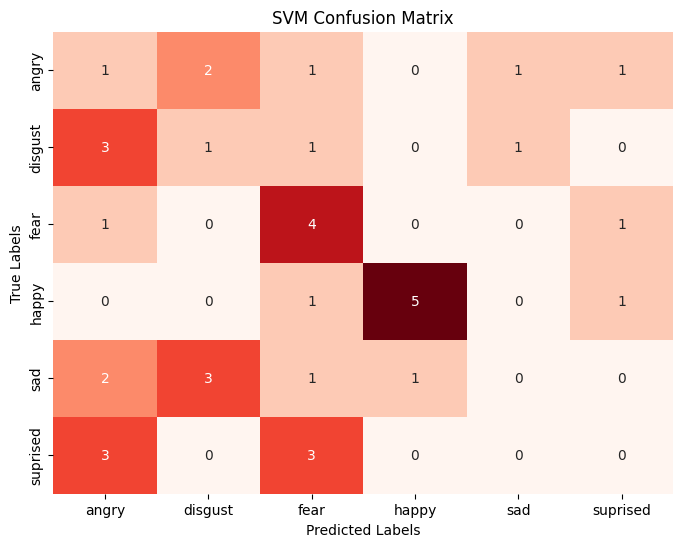

In [ ]:
# Model 1: Support Vector Machine

# All Features
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
confusionMatrix = confusion_matrix(y_test, svm_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix')
plt.show()

SVM Accuracy with selected features: 0.2894736842105263  in comparison with original accuracy:  0.2894736842105263 

SVM Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.10      0.17      0.12         6
     disgust       0.00      0.00      0.00         6
        fear       0.22      0.33      0.27         6
       happy       0.83      0.71      0.77         7
         sad       0.50      0.29      0.36         7
    suprised       0.25      0.17      0.20         6

    accuracy                           0.29        38
   macro avg       0.32      0.28      0.29        38
weighted avg       0.34      0.29      0.30        38



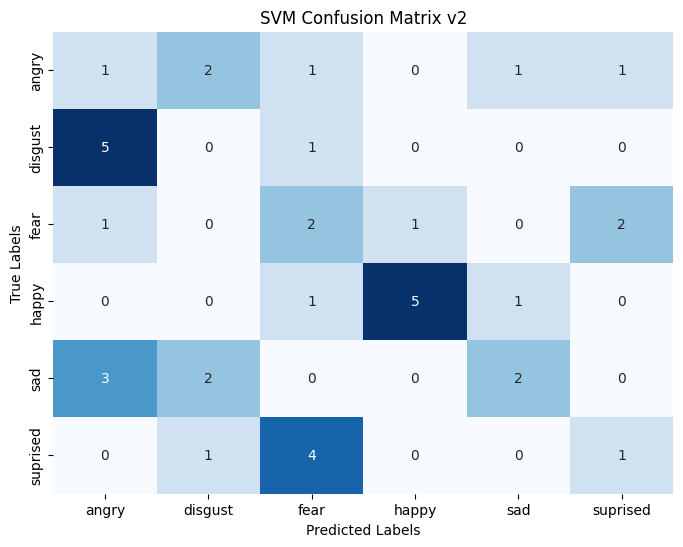

In [ ]:
# Selected Features
svm_model_selected = SVC(kernel='linear')
svm_model_selected.fit(X_train_selected, y_train)

svm_predictions_selected = svm_model_selected.predict(X_test_selected)
svm_accuracy_selected = accuracy_score(y_test, svm_predictions_selected)

print("SVM Accuracy with selected features:", svm_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, svm_predictions),'\n')
print("SVM Classification Report with selected features:")
print(classification_report(y_test, svm_predictions_selected))
confusionMatrix = confusion_matrix(y_test, svm_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix v2')
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

       angry       0.38      0.50      0.43         6
     disgust       0.50      0.33      0.40         6
        fear       0.00      0.00      0.00         6
       happy       1.00      0.71      0.83         7
         sad       0.43      0.43      0.43         7
    suprised       0.25      0.33      0.29         6

    accuracy                           0.39        38
   macro avg       0.43      0.38      0.40        38
weighted avg       0.44      0.39      0.41        38



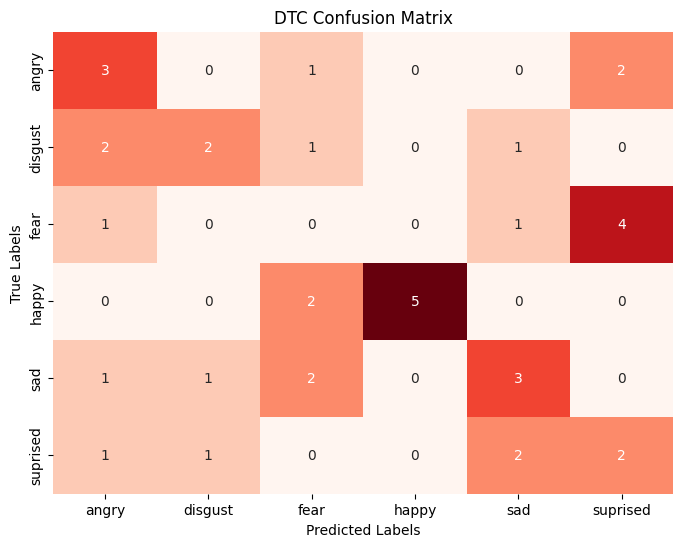

In [ ]:
# Model 2: Decision Tree model

# All Features
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

dtc_predictions = dtc_model.predict(X_test)

dtc_conf_matrix = confusion_matrix(y_test, dtc_predictions)

print("Decision Tree Classification Report:")
print(classification_report(y_test, dtc_predictions))
confusionMatrix = confusion_matrix(y_test, dtc_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DTC Confusion Matrix')
plt.show()

DTC Accuracy with selected features: 0.2894736842105263  in comparison with original accuracy:  0.39473684210526316 

DTC Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.10      0.17      0.12         6
     disgust       0.00      0.00      0.00         6
        fear       0.22      0.33      0.27         6
       happy       0.83      0.71      0.77         7
         sad       0.50      0.29      0.36         7
    suprised       0.25      0.17      0.20         6

    accuracy                           0.29        38
   macro avg       0.32      0.28      0.29        38
weighted avg       0.34      0.29      0.30        38



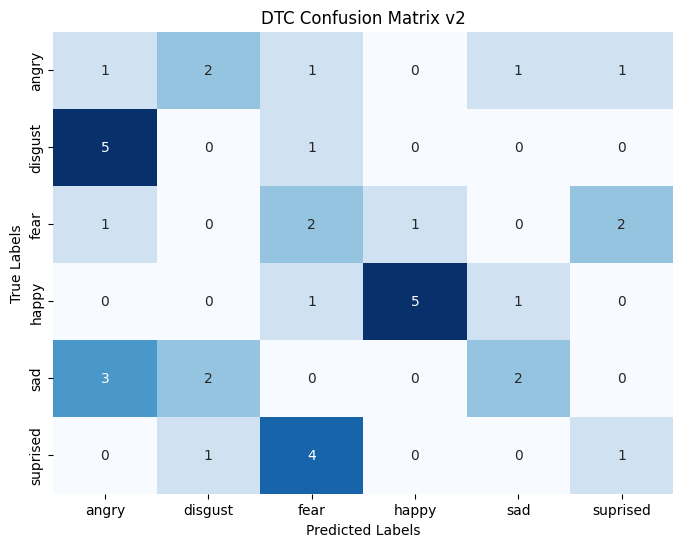

In [ ]:
# Selected Features
dtc_model_selected = SVC(kernel='linear')
dtc_model_selected.fit(X_train_selected, y_train)
dtc_accuracy = accuracy_score(y_test, dtc_predictions)

dtc_predictions_selected = dtc_model_selected.predict(X_test_selected)
dtc_accuracy_selected = accuracy_score(y_test, dtc_predictions_selected)

print("DTC Accuracy with selected features:", dtc_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, dtc_predictions),'\n')
print("DTC Classification Report with selected features:")
print(classification_report(y_test, dtc_predictions_selected))
confusionMatrix = confusion_matrix(y_test, dtc_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DTC Confusion Matrix v2')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

       angry       0.25      0.33      0.29         6
     disgust       0.11      0.17      0.13         6
        fear       0.00      0.00      0.00         6
       happy       0.78      1.00      0.88         7
         sad       0.67      0.29      0.40         7
    suprised       0.50      0.33      0.40         6

    accuracy                           0.37        38
   macro avg       0.38      0.35      0.35        38
weighted avg       0.40      0.37      0.36        38



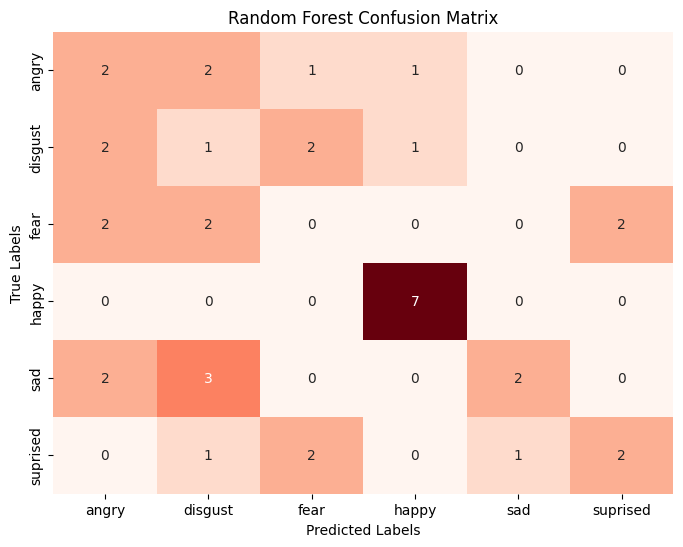

In [ ]:
# Model 3: Random Forest

# All Features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
confusionMatrix = confusion_matrix(y_test, rf_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

Random Forest Accuracy with selected features: 0.2894736842105263  in comparison with original accuracy:  0.3684210526315789 

Random Forest Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.10      0.17      0.12         6
     disgust       0.00      0.00      0.00         6
        fear       0.22      0.33      0.27         6
       happy       0.83      0.71      0.77         7
         sad       0.50      0.29      0.36         7
    suprised       0.25      0.17      0.20         6

    accuracy                           0.29        38
   macro avg       0.32      0.28      0.29        38
weighted avg       0.34      0.29      0.30        38



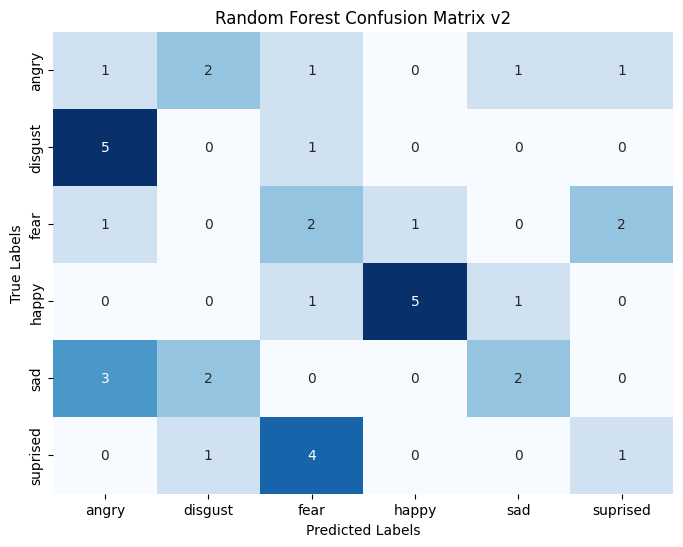

In [ ]:
# Selected Features
rf_model_selected = SVC(kernel='linear')
rf_model_selected.fit(X_train_selected, y_train)

rf_predictions_selected = rf_model_selected.predict(X_test_selected)
rf_accuracy_selected = accuracy_score(y_test, rf_predictions_selected)

print("Random Forest Accuracy with selected features:", rf_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, rf_predictions),'\n')
print("Random Forest Classification Report with selected features:")
print(classification_report(y_test, rf_predictions_selected))
confusionMatrix = confusion_matrix(y_test, rf_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix v2')
plt.show()

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       angry       0.33      0.33      0.33         6
     disgust       0.20      0.17      0.18         6
        fear       0.11      0.17      0.13         6
       happy       1.00      1.00      1.00         7
         sad       0.25      0.14      0.18         7
    suprised       0.29      0.33      0.31         6

    accuracy                           0.37        38
   macro avg       0.36      0.36      0.36        38
weighted avg       0.38      0.37      0.37        38



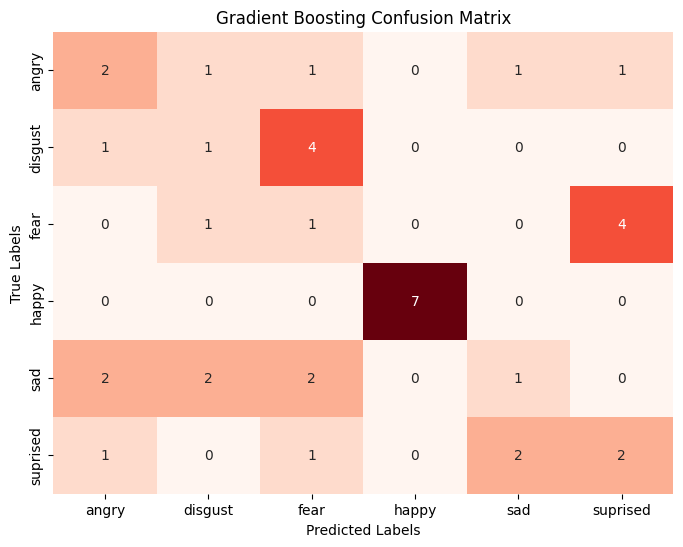

In [ ]:
# Model 4: Gradient Boosting

# All Features
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))
confusionMatrix = confusion_matrix(y_test, gb_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


Gradient Boosting Accuracy with selected features: 0.2894736842105263  in comparison with original accuracy:  0.3684210526315789 

Gradient Boosting Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.10      0.17      0.12         6
     disgust       0.00      0.00      0.00         6
        fear       0.22      0.33      0.27         6
       happy       0.83      0.71      0.77         7
         sad       0.50      0.29      0.36         7
    suprised       0.25      0.17      0.20         6

    accuracy                           0.29        38
   macro avg       0.32      0.28      0.29        38
weighted avg       0.34      0.29      0.30        38



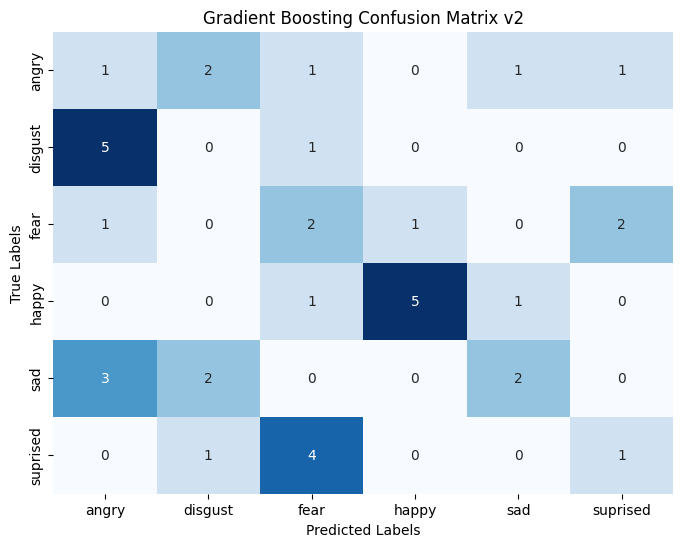

In [ ]:
# Selected Features
gb_model_selected = SVC(kernel='linear')
gb_model_selected.fit(X_train_selected, y_train)

gb_predictions_selected = gb_model_selected.predict(X_test_selected)
gb_accuracy_selected = accuracy_score(y_test, gb_predictions_selected)

print("Gradient Boosting Accuracy with selected features:", gb_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, gb_predictions),'\n')
print("Gradient Boosting Classification Report with selected features:")
print(classification_report(y_test, gb_predictions_selected))
confusionMatrix = confusion_matrix(y_test, gb_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix v2')
plt.show()

# Modeling repeat with normalized values.

In [ ]:
#What if we try to normalize the data to see if there's any new results.
scaler = MinMaxScaler()

X = np.array(data.drop(columns=['emotion']))
X = scaler.fit_transform(X)
y = np.array(data['emotion'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
second_max = 0.15
num_features_to_select = (math.ceil(totalFeatures*second_max))
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

SVM Classification Report:
              precision    recall  f1-score   support

       angry       0.20      0.33      0.25         6
     disgust       0.40      0.33      0.36         6
        fear       0.44      0.67      0.53         6
       happy       0.78      1.00      0.88         7
         sad       0.50      0.14      0.22         7
    suprised       1.00      0.50      0.67         6

    accuracy                           0.50        38
   macro avg       0.55      0.50      0.49        38
weighted avg       0.56      0.50      0.49        38



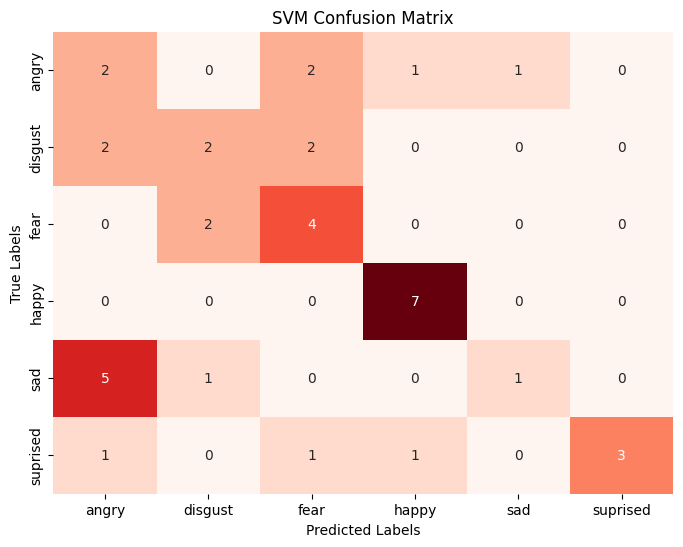

In [ ]:
# Model 1: Support Vector Machine

# All Features
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
confusionMatrix = confusion_matrix(y_test, svm_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix')
plt.show()

SVM Accuracy with selected features: 0.6052631578947368  in comparison with original accuracy:  0.5 

SVM Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.30      0.50      0.37         6
     disgust       0.67      0.33      0.44         6
        fear       0.62      0.83      0.71         6
       happy       0.78      1.00      0.88         7
         sad       0.50      0.29      0.36         7
    suprised       1.00      0.67      0.80         6

    accuracy                           0.61        38
   macro avg       0.64      0.60      0.60        38
weighted avg       0.64      0.61      0.60        38



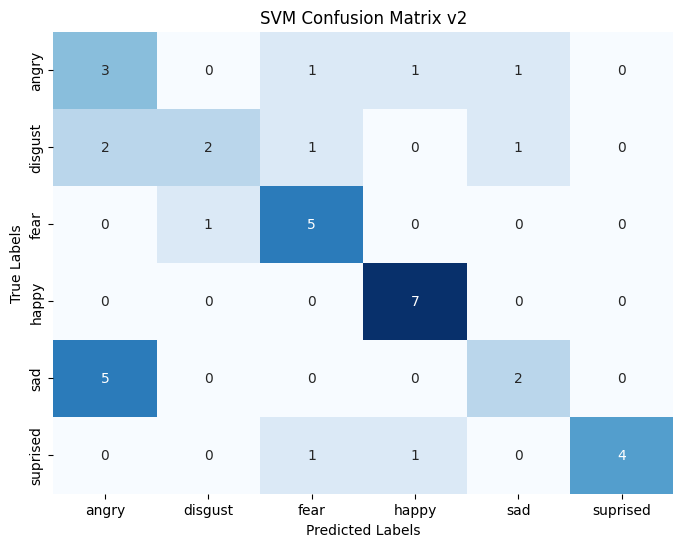

In [ ]:
# Selected Features
svm_model_selected = SVC(kernel='linear')
svm_model_selected.fit(X_train_selected, y_train)

svm_predictions_selected = svm_model_selected.predict(X_test_selected)
svm_accuracy_selected = accuracy_score(y_test, svm_predictions_selected)

print("SVM Accuracy with selected features:", svm_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, svm_predictions),'\n')
print("SVM Classification Report with selected features:")
print(classification_report(y_test, svm_predictions_selected))
confusionMatrix = confusion_matrix(y_test, svm_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix v2')
plt.show()

Decision Tree Classification Report:
              precision    recall  f1-score   support

       angry       0.43      0.50      0.46         6
     disgust       0.50      0.33      0.40         6
        fear       0.00      0.00      0.00         6
       happy       1.00      1.00      1.00         7
         sad       0.43      0.43      0.43         7
    suprised       0.22      0.33      0.27         6

    accuracy                           0.45        38
   macro avg       0.43      0.43      0.43        38
weighted avg       0.44      0.45      0.44        38



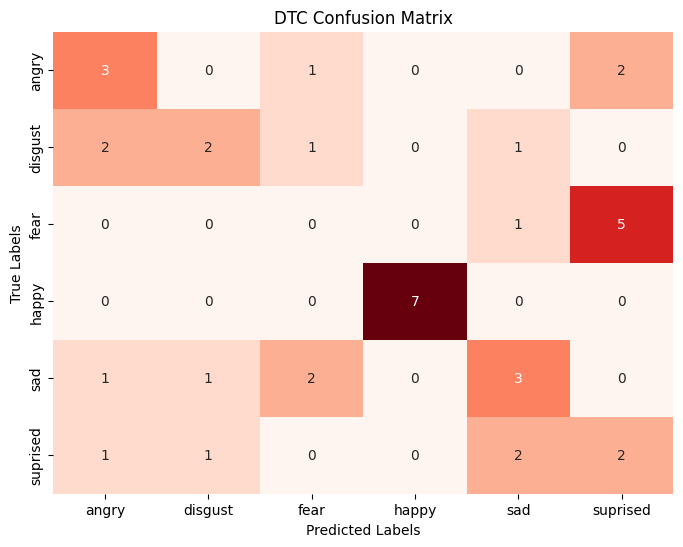

In [ ]:
# Model 2: Decision Tree model

# All Features
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

dtc_predictions = dtc_model.predict(X_test)

dtc_conf_matrix = confusion_matrix(y_test, dtc_predictions)

print("Decision Tree Classification Report:")
print(classification_report(y_test, dtc_predictions))
confusionMatrix = confusion_matrix(y_test, dtc_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DTC Confusion Matrix')
plt.show()

DTC Accuracy with selected features: 0.6052631578947368  in comparison with original accuracy:  0.4473684210526316 

DTC Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.30      0.50      0.37         6
     disgust       0.67      0.33      0.44         6
        fear       0.62      0.83      0.71         6
       happy       0.78      1.00      0.88         7
         sad       0.50      0.29      0.36         7
    suprised       1.00      0.67      0.80         6

    accuracy                           0.61        38
   macro avg       0.64      0.60      0.60        38
weighted avg       0.64      0.61      0.60        38



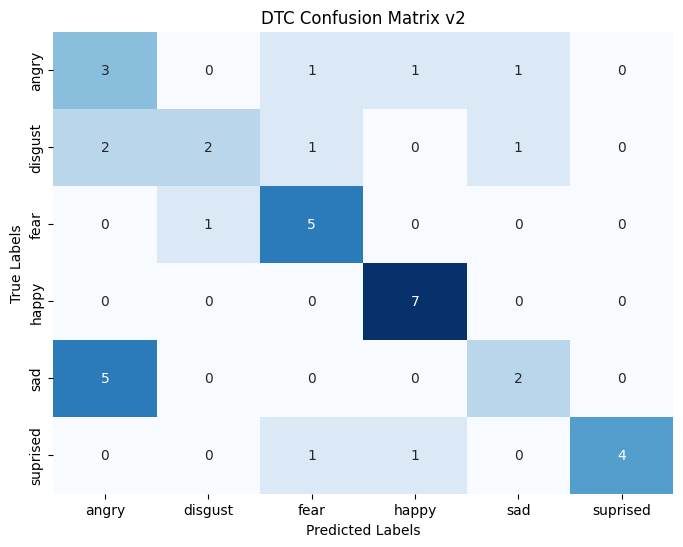

In [ ]:
# Selected Features
dtc_model_selected = SVC(kernel='linear')
dtc_model_selected.fit(X_train_selected, y_train)
dtc_accuracy = accuracy_score(y_test, dtc_predictions)

dtc_predictions_selected = dtc_model_selected.predict(X_test_selected)
dtc_accuracy_selected = accuracy_score(y_test, dtc_predictions_selected)

print("DTC Accuracy with selected features:", dtc_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, dtc_predictions),'\n')
print("DTC Classification Report with selected features:")
print(classification_report(y_test, dtc_predictions_selected))
confusionMatrix = confusion_matrix(y_test, dtc_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DTC Confusion Matrix v2')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

       angry       0.25      0.33      0.29         6
     disgust       0.11      0.17      0.13         6
        fear       0.00      0.00      0.00         6
       happy       0.78      1.00      0.88         7
         sad       0.67      0.29      0.40         7
    suprised       0.50      0.33      0.40         6

    accuracy                           0.37        38
   macro avg       0.38      0.35      0.35        38
weighted avg       0.40      0.37      0.36        38



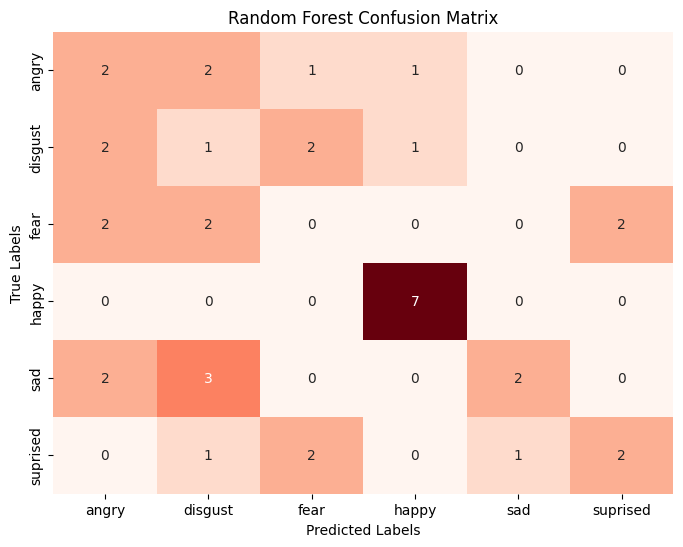

In [ ]:
# Model 3: Random Forest

# All Features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
confusionMatrix = confusion_matrix(y_test, rf_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

Random Forest Accuracy with selected features: 0.6052631578947368  in comparison with original accuracy:  0.3684210526315789 

Random Forest Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.30      0.50      0.37         6
     disgust       0.67      0.33      0.44         6
        fear       0.62      0.83      0.71         6
       happy       0.78      1.00      0.88         7
         sad       0.50      0.29      0.36         7
    suprised       1.00      0.67      0.80         6

    accuracy                           0.61        38
   macro avg       0.64      0.60      0.60        38
weighted avg       0.64      0.61      0.60        38



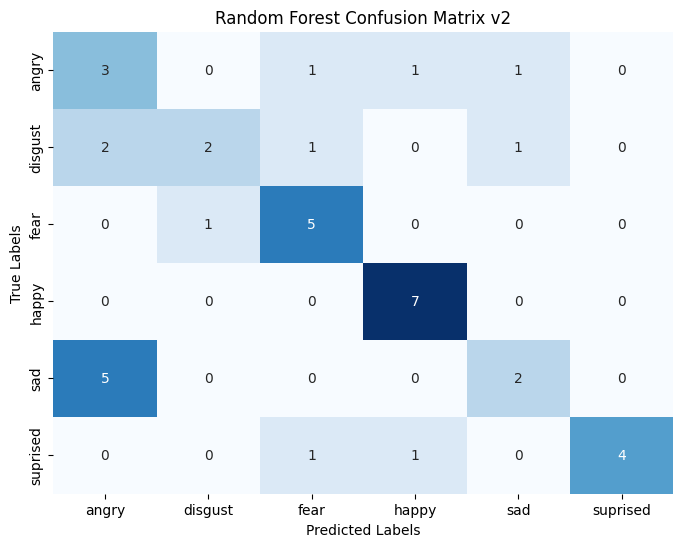

In [ ]:
# Selected Features
rf_model_selected = SVC(kernel='linear')
rf_model_selected.fit(X_train_selected, y_train)

rf_predictions_selected = rf_model_selected.predict(X_test_selected)
rf_accuracy_selected = accuracy_score(y_test, rf_predictions_selected)

print("Random Forest Accuracy with selected features:", rf_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, rf_predictions),'\n')
print("Random Forest Classification Report with selected features:")
print(classification_report(y_test, rf_predictions_selected))
confusionMatrix = confusion_matrix(y_test, rf_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix v2')
plt.show()

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       angry       0.33      0.33      0.33         6
     disgust       0.20      0.17      0.18         6
        fear       0.11      0.17      0.13         6
       happy       1.00      1.00      1.00         7
         sad       0.25      0.14      0.18         7
    suprised       0.29      0.33      0.31         6

    accuracy                           0.37        38
   macro avg       0.36      0.36      0.36        38
weighted avg       0.38      0.37      0.37        38



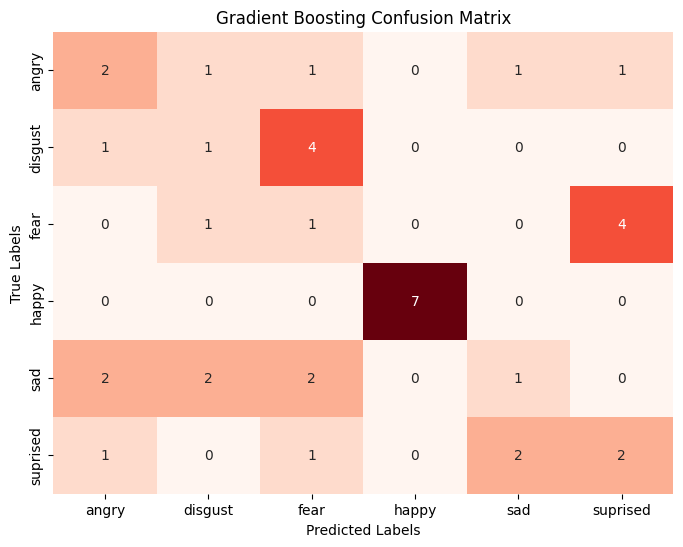

In [ ]:
# Model 4: Gradient Boosting

# All Features
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))
confusionMatrix = confusion_matrix(y_test, gb_predictions, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


Gradient Boosting Accuracy with selected features: 0.6052631578947368  in comparison with original accuracy:  0.3684210526315789 

Gradient Boosting Classification Report with selected features:
              precision    recall  f1-score   support

       angry       0.30      0.50      0.37         6
     disgust       0.67      0.33      0.44         6
        fear       0.62      0.83      0.71         6
       happy       0.78      1.00      0.88         7
         sad       0.50      0.29      0.36         7
    suprised       1.00      0.67      0.80         6

    accuracy                           0.61        38
   macro avg       0.64      0.60      0.60        38
weighted avg       0.64      0.61      0.60        38



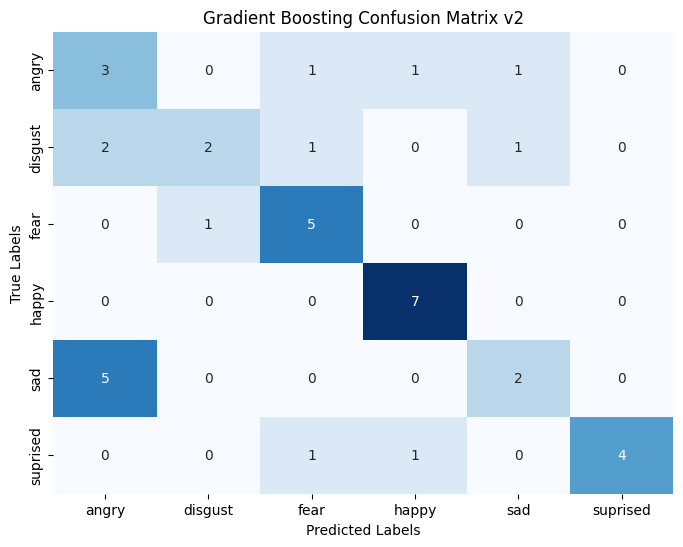

In [ ]:
# Selected Features
gb_model_selected = SVC(kernel='linear')
gb_model_selected.fit(X_train_selected, y_train)

gb_predictions_selected = gb_model_selected.predict(X_test_selected)
gb_accuracy_selected = accuracy_score(y_test, gb_predictions_selected)

print("Gradient Boosting Accuracy with selected features:", gb_accuracy_selected," in comparison with original accuracy: ", accuracy_score(y_test, gb_predictions),'\n')
print("Gradient Boosting Classification Report with selected features:")
print(classification_report(y_test, gb_predictions_selected))
confusionMatrix = confusion_matrix(y_test, gb_predictions_selected, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix v2')
plt.show()